In [1]:
import warnings
from os.path import join as ospj

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Insira aqui o caminho para os dados processados!
BASEPATH = '../YoutubeData/processed/'

warnings.filterwarnings('ignore')

# Funções auxiliares

In [2]:
def head(df, n=5):
    """ Função auxiliar para exibir as 'n' primeiras linhas dos dados e o seu formato """
    print('Formato dos dados:', df.shape)
    display(df.head(n))
    
def load_data(country):
    """ Função auxiliar para carregar os dados de um país, convertendo as datas no formato datetime """
    filepath = ospj(BASEPATH, f'{country}data.csv')
    return pd.read_csv(filepath, parse_dates=['trending_date', 'publish_time'])

# 1) Visualizações gerais por categoria

## 1.1) Contagem de vídeos que entraram em trending mais de uma vez

In [3]:
us_data = load_data('US')

trend_count = us_data.groupby(['title', 'category_name']).size()
trend_count = trend_count.reset_index(name='trend_count')
head(trend_count)

Formato dos dados: (6372, 3)


,title,category_name,trend_count
0,#184 Making a PCB using EasyEDA. // Review,Science & Technology,1
1,"#23 Feed The Homeless | One List, One Life",People & Blogs,6
2,#57: AM and SSB explained,Science & Technology,4
3,"#AboveTheNoise feat. Serena Williams, Neymar J...",Music,1
4,#DisneyParksLIVE: Fantasy In The Sky New Years...,Entertainment,4


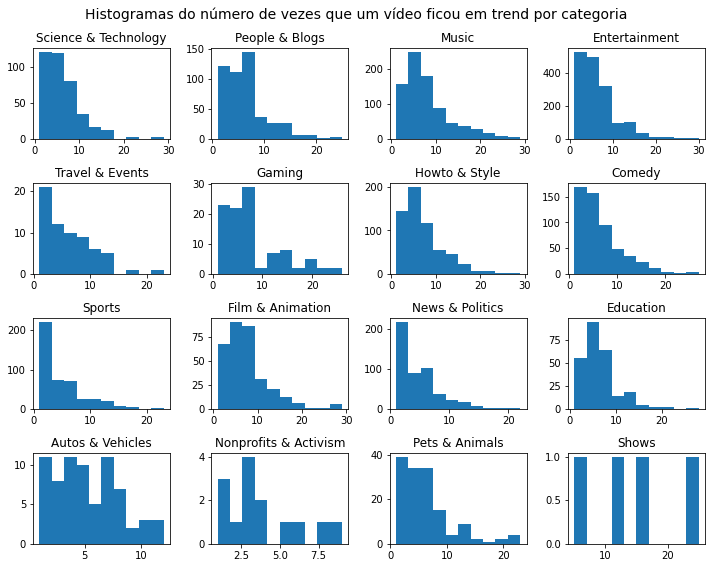

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,8))

categories = trend_count['category_name'].unique().reshape((4,4))
for i in range(4):
    for j in range(4):
        category = categories[i][j]
        axs[i,j].set_title(f'{category}')
        axs[i,j].hist(trend_count[trend_count['category_name'] == category]['trend_count'])

fig.suptitle('Histogramas do número de vezes que um vídeo ficou em trend por categoria', fontsize=14)
fig.tight_layout()
fig.show()

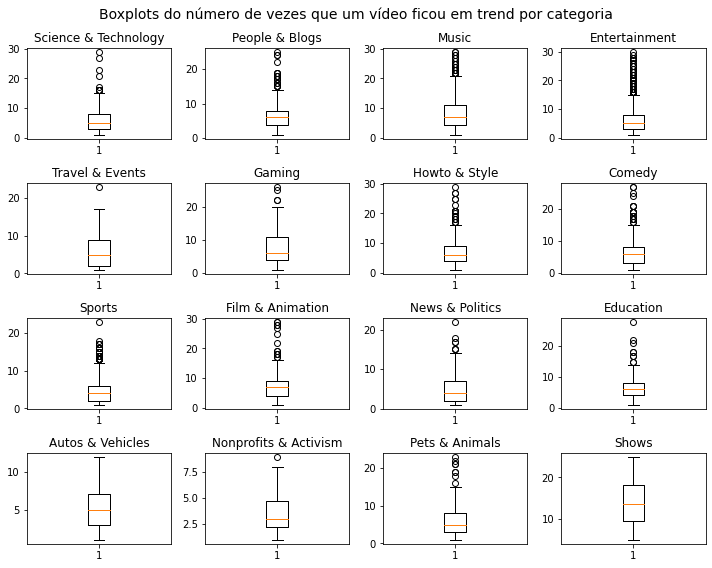

In [5]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10,8))

categories = trend_count['category_name'].unique().reshape((4,4))
for i in range(4):
    for j in range(4):
        category = categories[i][j]
        axs[i,j].set_title(f'{category}')
        axs[i,j].boxplot(trend_count[trend_count['category_name'] == category]['trend_count'])

fig.suptitle('Boxplots do número de vezes que um vídeo ficou em trend por categoria', fontsize=14)
fig.tight_layout()
fig.show()

## 1.2) Ranking das categorias mais vistas

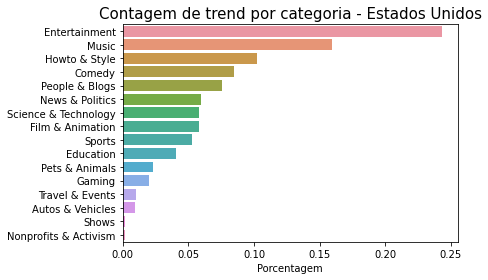

In [6]:
use_percentage = True
country_code, country_name = 'US', 'Estados Unidos'

data = load_data(country_code)

category_counts = data.groupby('category_name').size()
if use_percentage:
    category_counts = (category_counts / sum(category_counts))

category_counts = category_counts.sort_values(ascending=False)
plt.title(f'Contagem de trend por categoria - {country_name}', fontsize=15)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.ylabel(None)
plt.xlabel('Porcentagem' if use_percentage else 'Contagem de trend')
plt.show()

## 1.3) Ranking de categorias com mais vídeos

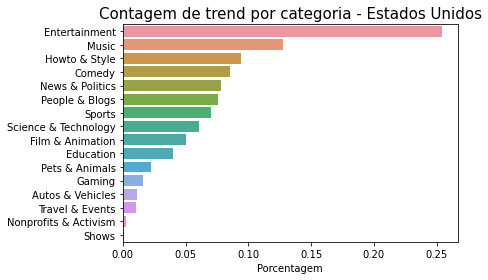

In [7]:
use_percentage = True
country_code, country_name = 'US', 'Estados Unidos'

data = load_data(country_code)

video_counts = data.groupby('category_name')['title'].unique()
for i in range(len(video_counts)):
    video_counts.iloc[i] = len(video_counts.iloc[i])

if use_percentage:
    video_counts = (video_counts / sum(video_counts))

video_counts = video_counts.sort_values(ascending=False)
plt.title(f'Contagem de trend por categoria - {country_name}', fontsize=15)
sns.barplot(x=video_counts.values, y=video_counts.index)
plt.ylabel(None)
plt.xlabel('Porcentagem' if use_percentage else 'Número de vídeos')
plt.show()

# 2) Visualizações de "métricas" para cada categoria

- Por métricas, queremos dizer número de likes, dislikes, views e comentários.

## 2.1) Ranking do número de likes em cada categoria

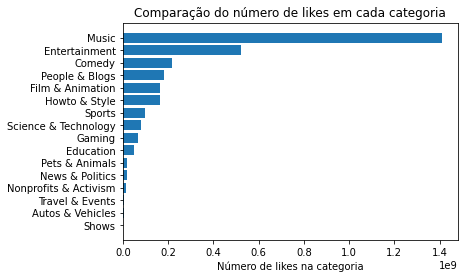

In [8]:
num_likes = us_data.groupby('category_name')['likes'].sum()
num_likes = num_likes.sort_values()

plt.title('Comparação do número de likes em cada categoria')
plt.xlabel('Número de likes na categoria')
plt.barh(y=num_likes.index, width=num_likes.values)
plt.show()

## 2.2) Ranking do número de dislikes em cada categoria

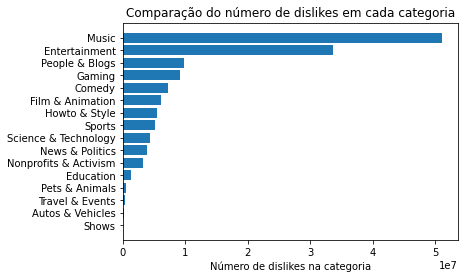

In [9]:
num_dislikes = us_data.groupby('category_name')['dislikes'].sum()
num_dislikes = num_dislikes.sort_values()

plt.title('Comparação do número de dislikes em cada categoria')
plt.xlabel('Número de dislikes na categoria')
plt.barh(y=num_dislikes.index, width=num_dislikes.values)
plt.show()

## 2.3) Ranking do número de comentários em cada categoria

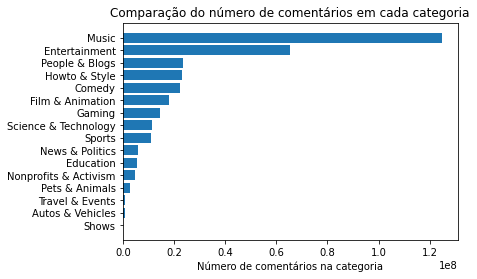

In [10]:
num_comments = us_data.groupby('category_name')['comment_count'].sum()
num_comments = num_comments.sort_values()

plt.title('Comparação do número de comentários em cada categoria')
plt.xlabel('Número de comentários na categoria')
plt.barh(y=num_comments.index, width=num_comments.values)
plt.show()

## 2.4) Ranking do número de views em cada categoria

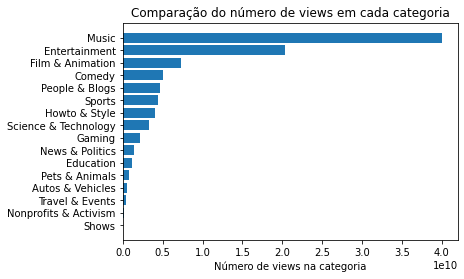

In [11]:
num_views = us_data.groupby('category_name')['views'].sum()
num_views = num_views.sort_values()

plt.title('Comparação do número de views em cada categoria')
plt.xlabel('Número de views na categoria')
plt.barh(y=num_views.index, width=num_views.values)
plt.show()

# 3) Vídeos mais vistos por país

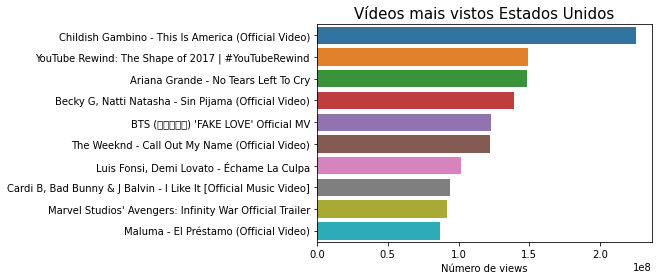

In [12]:
country_code, country_name = 'US', 'Estados Unidos'

data = load_data(country_code)

top10_view = []
top10_view_name = data.sort_values(by='views', ascending=False)['title'].unique().tolist()[:10]
for i in range(len(top10_view_name)):
    top10_view.append(data[data['title']==top10_view_name[i]]['views'].sort_values(ascending=False)[:1].values[0])
    
sns.barplot(x=top10_view, y=top10_view_name)
plt.title(f'Vídeos mais vistos {country_name}', fontsize=15)
plt.ylabel(None)
plt.xlabel('Número de views')
plt.show()